# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
178,2023-10-10,15,15,13,86.666667,13.333333,181.3180,medium,2023-10-10
179,2023-10-11,18,18,15,83.333333,16.666667,73.9930,easy,2023-10-11
180,2023-10-12,19,17,17,100.000000,0.000000,86.9310,easy,2023-10-12
181,2023-10-13,20,18,15,83.333333,16.666667,150.4095,medium,2023-10-13


How many people are playing Reflect?

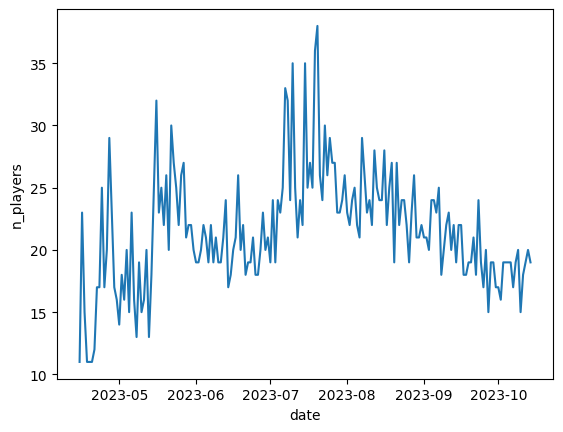

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

400

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2023-10-10,15,15,13,86.666667,13.333333,181.3180,medium,2023-10-10,puzzle-2023-10-10.txt,...,5.800000,8,29,4,0,2,1,10,4,106.5
179,2023-10-11,18,18,15,83.333333,16.666667,73.9930,easy,2023-10-11,puzzle-2023-10-11.txt,...,5.800000,9,29,4,0,4,2,10,3,47.2
180,2023-10-12,19,17,17,100.000000,0.000000,86.9310,easy,2023-10-12,puzzle-2023-10-12.txt,...,5.200000,7,26,2,0,4,2,10,3,91.4
181,2023-10-13,20,18,15,83.333333,16.666667,150.4095,medium,2023-10-13,puzzle-2023-10-13.txt,...,5.400000,10,27,6,0,2,1,8,4,115.3


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

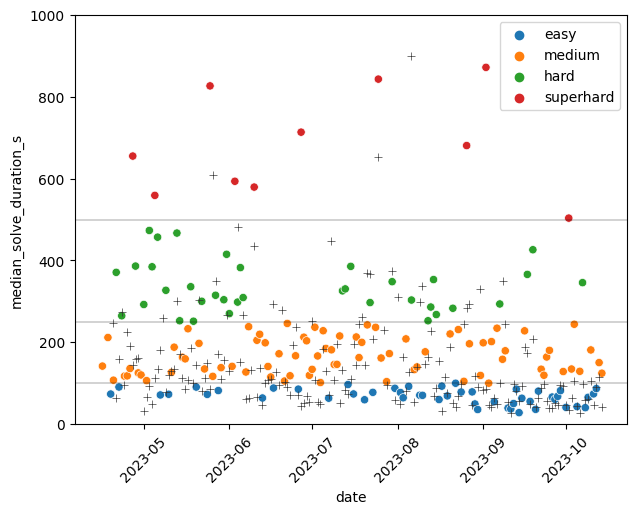

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

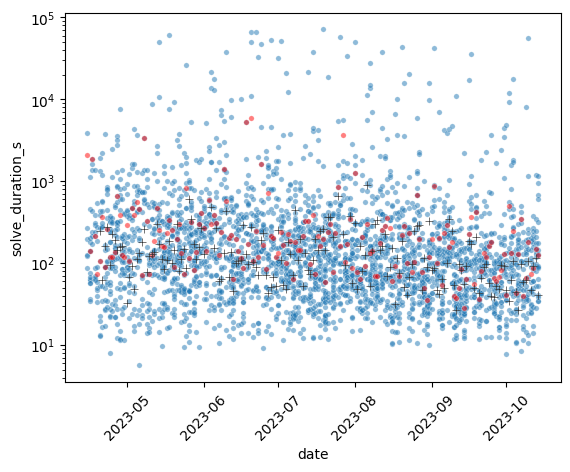

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

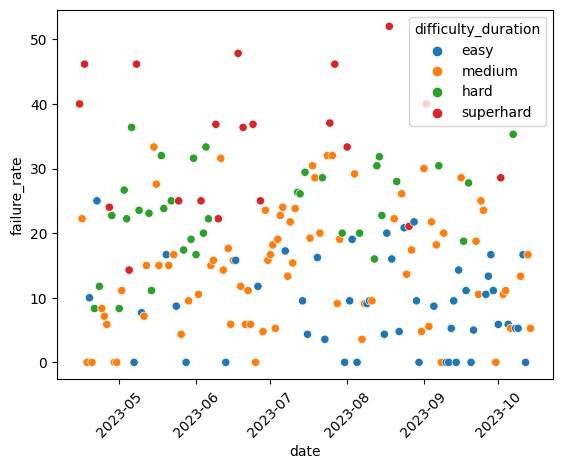

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.546944,0.081215,0.067175,0.124531,0.071492,-0.020745,0.123881,0.019870,0.089345,0.088886,0.092849,-0.031756,0.095749,0.202691,0.167811,0.188708,0.157039
failure_rate,0.546944,1.000000,0.124244,0.057864,0.082459,0.067597,0.035784,0.203475,0.010032,0.053596,0.101517,0.023189,-0.039300,0.175153,0.134590,0.262226,0.199811,0.154904
total_beam_distance,0.202691,0.134590,0.149204,0.098962,0.466045,0.331943,-0.228386,0.156832,0.049468,0.298747,-0.052758,0.429570,0.115318,0.347267,1.000000,0.320287,0.128310,0.025399
excess_reflections,0.188708,0.199811,0.329426,-0.457735,-0.319276,0.602445,0.519029,0.550246,-0.143566,-0.153270,-0.288217,0.357717,0.389940,0.197917,0.128310,0.163277,1.000000,0.783144
excess_beam_distance,0.167811,0.262226,-0.141879,-0.280559,-0.162331,0.255396,0.068268,0.262677,-0.168963,-0.039727,-0.307830,0.303933,0.364845,0.712178,0.320287,1.000000,0.163277,0.056625
num_excess_reflection_beams,0.157039,0.154904,0.258092,-0.230913,-0.204783,0.405722,0.458851,0.203698,0.037009,0.006193,-0.012475,0.240583,0.181816,0.016085,0.025399,0.056625,0.783144,1.000000
num_beams,0.124531,0.082459,-0.046074,0.816031,1.000000,-0.223231,-0.596436,-0.150346,0.163300,0.786311,0.619771,0.173912,-0.798886,-0.195593,0.466045,-0.162331,-0.319276,-0.204783
max_blocks_per_beam,0.123881,0.203475,0.152932,-0.323388,-0.150346,0.474518,0.339172,1.000000,-0.268628,0.020301,-0.151859,0.369528,0.229220,0.321763,0.156832,0.262677,0.550246,0.203698
max_beam_distance,0.095749,0.175153,-0.082780,-0.279831,-0.195593,0.191714,0.005801,0.321763,-0.252290,-0.172387,-0.348713,0.192899,0.418379,1.000000,0.347267,0.712178,0.197917,0.016085
num_double_reflect_blocks,0.092849,0.023189,0.136971,-0.056854,0.173912,0.731387,0.294108,0.369528,0.285886,0.409915,-0.298873,1.000000,0.013546,0.192899,0.429570,0.303933,0.357717,0.240583


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

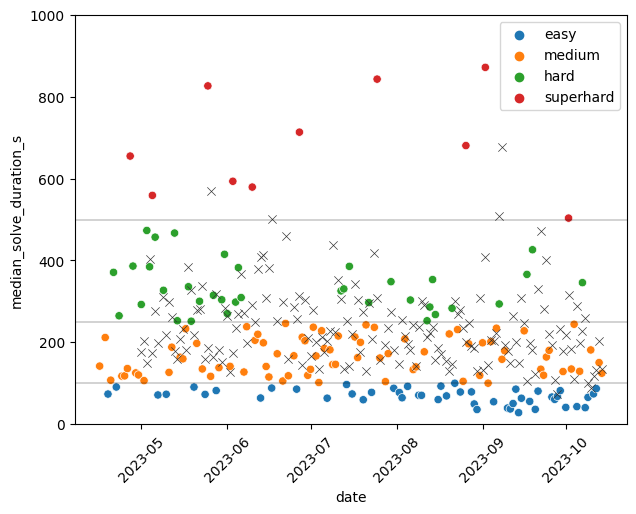

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');